In [159]:
import pandas as pd
import re
import itertools
import numpy as np
import random
from sklearn.model_selection import train_test_split

%matplotlib inline

random.seed(0)
np.random.seed(0)

mu, sigma = 0, 0.1 

# Análise dos dados de precedentes do STJ

In [160]:
stj = pd.read_csv('../datasets/jurisprudencias_stj.csv', index_col=0)
stj['PROCESSO'] = stj['PROCESSO'].apply(lambda x: re.sub('Processo\n','',x))
stj['RELATOR'] = stj['RELATOR'].apply(lambda x: re.sub('Relator(a)\n','',x))
stj['ORGAO'] = stj['ORGAO'].apply(lambda x: re.sub('Órgão Julgador\n','',x))
stj['DATA_JULGAMENTO'] = stj['DATA_JULGAMENTO'].apply(lambda x: re.sub('Data do Julgamento\n','',x))
stj['DATA_PUBLICACAO'] = stj['DATA_PUBLICACAO'].apply(lambda x: re.sub('Data da Publicação/Fonte\nDJe','',x))
stj['EMENTA'] = stj['EMENTA'].apply(lambda x: re.sub('Ementa\n','',x))

Total de precedentes extraídos:  7407
Total de Jurisprudências:  1458


Histograma precedentes por Jurisprudência: 


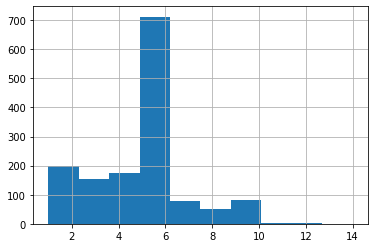

In [161]:
print('Total de precedentes extraídos: ', len(stj))
print('Total de Jurisprudências: ', len(stj.TEMA.unique()))
print('\n\nHistograma precedentes por Jurisprudência: ')
stj.TEMA.value_counts().hist()

O histograma mostra que grande parte das jurisprudências extraídas possuem entre 5 e 6 precedentes.

In [162]:
stj1 = stj[stj.groupby(['TEMA'])['EMENTA'].transform('count') > 5]

In [163]:
def replace_edicao(text):
    s = re.sub("^EDIÇÃO N\. \d+:", "", text).strip()
    s = re.sub(" - M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})$","", s)
    s = re.sub(" M{0,4}(CM|CD|D?C{0,3})(XC|XL|L?X{0,3})(IX|IV|V?I{0,3})$","", s)
    
    return s

stj1.NATUREZA = stj1.NATUREZA.map(replace_edicao)
stj1.to_csv('../datasets/jurisprudencias_stj_clean.csv', index=False)
stj1

/home/danieljunior/anaconda3/envs/ml/lib/python3.8/site-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,MATERIA,NATUREZA,TEMA,PROCESSO,RELATOR,ORGAO,DATA_JULGAMENTO,DATA_PUBLICACAO,EMENTA
0,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,AgRg no AREsp 331607 / SP\nAGRAVO REGIMENTAL N...,Relator(a)\nMinistro HERMAN BENJAMIN (1132),T2 - SEGUNDA TURMA,15/08/2013,16/09/2013,PROCESSUAL CIVIL. AGRAVO REGIMENTAL. ART. 535 ...
1,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,RMS 31995 / RS\nRECURSO ORDINÁRIO EM MANDADO D...,Relator(a)\nMinistro SÉRGIO KUKINA (1155),T1 - PRIMEIRA TURMA,15/08/2013,26/08/2013,RECURSO ORDINÁRIO EM MANDADO DE SEGURANÇA. ORD...
2,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,RMS 32169 / RN\nRECURSO ORDINÁRIO EM MANDADO D...,Relator(a)\nMinistro HUMBERTO MARTINS (1130),T2 - SEGUNDA TURMA,02/05/2013,17/06/2013,PROCESSUAL CIVIL E ADMINISTRATIVO. MANDADO DE ...
3,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,AgRg no REsp 1256653 / SP\nAGRAVO REGIMENTAL N...,Relator(a)\nMinistro BENEDITO GONÇALVES (1142),T1 - PRIMEIRA TURMA,28/08/2012,05/09/2012,PROCESSUAL CIVIL E ADMINISTRATIVO. AGRAVO REGI...
4,DIREITO ADMINISTRATIVO,PROCESSO ADMINISTRATIVO DISCIPLINAR,1) A falta de defesa técnica por advogado no p...,MS 15313 / DF\nMANDADO DE SEGURANÇA\n2010/0092...,Relator(a)\nMinistro MAURO CAMPBELL MARQUES (1...,S1 - PRIMEIRA SEÇÃO,09/11/2011,18/11/2011,ADMINISTRATIVO. MANDADO DE SEGURANÇA. SERVIDOR...
...,...,...,...,...,...,...,...,...,...
7402,DIREITO PENAL,LEI DE DROGAS,5) Reconhecida a inconstitucionalidade da veda...,HC 266190 / SP\nHABEAS CORPUS\n2013/0066727-0,Relator(a)\nMinistro NEFI CORDEIRO (1159),T6 - SEXTA TURMA,25/08/2015,15/09/2015,PROCESSUAL PENAL E PENAL. HABEAS CORPUS. S...
7403,DIREITO PENAL,LEI DE DROGAS,5) Reconhecida a inconstitucionalidade da veda...,HC 327125 / SP\nHABEAS CORPUS\n2015/0140557-2,Relator(a)\nMinistro REYNALDO SOARES DA FONSEC...,T5 - QUINTA TURMA,25/08/2015,01/09/2015,HABEAS CORPUS SUBSTITUTO DE RECURSO. INADEQUAÇ...
7404,DIREITO PENAL,LEI DE DROGAS,5) Reconhecida a inconstitucionalidade da veda...,HC 311010 / RS\nHABEAS CORPUS\n2014/0324066-4,Relator(a)\nMinistro FELIX FISCHER (1109),T5 - QUINTA TURMA,30/06/2015,17/08/2015,PENAL E PROCESSUAL PENAL. HABEAS CORPUS SUBSTI...
7405,DIREITO PENAL,LEI DE DROGAS,5) Reconhecida a inconstitucionalidade da veda...,HC 317402 / SP\nHABEAS CORPUS\n2015/0040964-5,Relator(a)\nMinistro JORGE MUSSI (1138),T5 - QUINTA TURMA,05/05/2015,14/05/2015,HABEAS CORPUS. IMPETRAÇÃO EM SUBSTITUIÇÃO AO R...


Ao fazer um filtro mantendo apenas os precedentes de jurisprudências onde o total de precedentes é maior que 5, ficam <strong>4.902</strong> precedentes.

Levando em consideração que cada jurisprudência desse novo conjunto de dados terá no mínimo 5 precedentes, utilizando a fórmula de combinação 𝐶(𝑛,𝑟)=𝑛!/(𝑟!(𝑛−𝑟)!), onde n=10 e r=2, temos que para cada jurisprudência podemos gerar no mínimo 10 pares de precedentes sem repetição.

In [164]:
stj_sts_data = []

In [165]:
for group_name, tema_group in stj1.groupby('TEMA'):
    pares = list(set(itertools.combinations(tema_group.EMENTA, 2)))
    noise = np.random.normal(mu, sigma, len(pares))
    scores = [4.5]*len(pares)+noise
    for i, par in enumerate(pares):
       stj_sts_data.append([par[0], par[1], scores[i], 4])

precedentes_mesma_jurisprudencia = len(stj_sts_data)
print('Total de pares de precedentes da mesma Jurisprudência gerados: ', precedentes_mesma_jurisprudencia)


Total de pares de precedentes da mesma Jurisprudência gerados:  14556


Agora preciso gerar também pares de precedentes que não são similares. Para isso posso usar a informação da Matéria de cada precedente, e gerar pares entre Matérias diferentes, o que garante que a similaridade entre os precedentes seja praticamente nula. Como os pares não similares gerados por essa abordagem será maior que a quantidade de pares da mesma jurisprudência gerados pelo passo anterior, uso a relação da quantidade de pares precedentes da mesma jurisprudência, e os pares de Matérias diferentes para manter um conjunto de dados balanceado.

In [166]:
#gero pares de matérias diferentes
pares_materias = list(set(itertools.combinations(stj1.MATERIA.unique().tolist(), 2)))
print('Total de pares de diferentes Matérias: ' , len(pares_materias))
total_por_par_materias = int(precedentes_mesma_jurisprudencia/len(pares_materias))
print('Total de pares a serem usados a partir de cada par de Matéria: ', total_por_par_materias)
for materias_par in list(set(itertools.combinations(stj1.MATERIA.unique().tolist(), 2))):
    #recupero as ementas das duas diferentes matérias
    precedentes_materias = [stj1[stj1.MATERIA == materia].EMENTA.tolist() for materia in materias_par]
    # gero um produto cartesiano entre as ementas das diferentes matérias
    pares = list(itertools.product(*precedentes_materias))[:total_por_par_materias]
    noise = np.random.normal(mu, sigma, len(pares))
    scores = [0.5]*len(pares)+noise
    for i, par in enumerate(pares):
       stj_sts_data.append([par[0], par[1], scores[i], 0])
print('Total de pares até o momento: ', len(stj_sts_data))

Total de pares de diferentes Matérias:  21
Total de pares a serem usados a partir de cada par de Matéria:  693
Total de pares até o momento:  29109


In [167]:
pares_natureza = []
for group_name, natureza_group in stj1.groupby('NATUREZA'):
    for temas_pares in list(set(itertools.combinations(natureza_group.TEMA.unique(), 2))):
        precedentes_temas = [natureza_group[natureza_group.TEMA == tema].EMENTA.tolist() 
                                for tema in temas_pares]
        pares = list(itertools.product(*precedentes_temas))
        noise = np.random.normal(mu, sigma, len(pares))
        scores = [3]*len(pares)+noise
        for i, par in enumerate(pares):
            pares_natureza.append([par[0], par[1], scores[i], 3])

In [168]:
samples_pares_natureza = random.sample(pares_natureza, precedentes_mesma_jurisprudencia)
stj_sts_data = stj_sts_data + samples_pares_natureza
print('Total de pares até o momento', len(stj_sts_data))

Total de pares até o momento 43665


In [169]:
stj_sts_df = pd.DataFrame(stj_sts_data, columns=['sentence_A','sentence_B','score','range'])
stj_sts_df = stj_sts_df.dropna()

In [170]:
train, test = train_test_split(stj_sts_df, 
                            test_size=0.3, 
                            stratify=stj_sts_df.range,
                            shuffle=True,
                            random_state=42)
test, valid = train_test_split(test, 
                            test_size=0.3, 
                            stratify=test.range,
                            shuffle=True,
                            random_state=42)

In [171]:
stj_sts_df.loc[train.index.values,'SPLIT'] = 'TRAIN'
stj_sts_df.loc[test.index.values,'SPLIT'] = 'TEST'
stj_sts_df.loc[valid.index.values,'SPLIT'] = 'VALID'

In [172]:
print(stj_sts_df)
stj_sts_df.to_csv('../datasets/stj_sts.csv', index=False)

                                              sentence_A  \
0      PROCESSUAL CIVIL E ADMINISTRATIVO. RECURSO ESP...   
1      CONFLITO  NEGATIVO  DE COMPETÊNCIA. NOMEAÇÃO P...   
2      PROCESSUAL CIVIL. ADMINISTRATIVO. CONCURSO PÚB...   
3      PROCESSUAL CIVIL E ADMINISTRATIVO. RECURSO ESP...   
4      AGRAVO REGIMENTAL. CONFLITO DE COMPETÊNCIA. CO...   
...                                                  ...   
43660  DIREITO EMPRESARIAL, TRIBUTÁRIO E ADMINISTRATI...   
43661  PENAL. EXCEÇÃO DA VERDADE. CRIME DE IMPRENSA. ...   
43662  AGRAVO REGIMENTAL NO AGRAVO EM RECURSO ESPECIA...   
43663  PROCESSO CIVIL. IMPROBIDADE ADMINISTRATIVA. PE...   
43664  CIVIL E PROCESSUAL CIVIL. BANCÁRIO. AGRAVO REG...   

                                              sentence_B     score  range  \
0      AGRAVO REGIMENTAL. CONFLITO DE COMPETÊNCIA. CO...  4.676405      4   
1      PROCESSUAL CIVIL E ADMINISTRATIVO. RECURSO ESP...  4.540016      4   
2      AGRAVO REGIMENTAL. CONFLITO DE COMPETÊNCI

# Análise de dados dos precedentes do TCU

Index(['AREA', 'TEMA', 'SUBTEMA', 'ENUNCIADO', 'PROCESSO', 'ANO',
       'TIPO_PROCESSO', 'RELATOR', 'VOTO'],
      dtype='object')
Total de precedentes extraídos:  441
Total de Jurisprudências:  44
Áreas: ['Responsabilidade' 'Licitação' 'Direito Processual' 'Pessoal']
Total de Temas:  27
Total de Subtemas:  38

Histograma precedentes por Jurisprudência: 


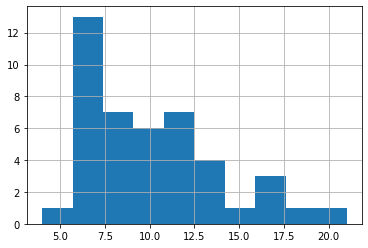

In [173]:
tcu = pd.read_csv('../datasets/jurisprudencias_tcu.csv', index_col=0)
print(tcu.columns)
print('Total de precedentes extraídos: ', len(tcu))
print('Total de Jurisprudências: ', len(tcu.ENUNCIADO.unique()))
print('Áreas: '+str(tcu.AREA.unique()))
print('Total de Temas: ', len(tcu.TEMA.unique()))
print('Total de Subtemas: ', len(tcu.SUBTEMA.unique()))

print('\nHistograma precedentes por Jurisprudência: ')
tcu.ENUNCIADO.value_counts().hist()

In [174]:
for group_name, df_group in tcu.groupby('TEMA'):
    print(group_name)
    print(df_group.SUBTEMA.unique())

Adicional por tempo de serviço
['Gratificação bienal']
Aposentadoria por invalidez
['Capacidade laboral']
Aposentadoria proporcional
['Proventos']
Ato sujeito a registro
['Ato complexo' 'Princípio da ampla defesa']
Bens e serviços de informática
['Medição']
Cadastramento
['Sicaf']
Conselho de fiscalização profissional
['Admissão de pessoal']
Convênio
['Gestor sucessor' 'Entidade de direito privado']
Cooperativa
['Vedação']
Dispensa de licitação
['Concurso público' 'Empresa controlada' 'Entidade sem fins lucrativos']
Débito
['Imprescritibilidade']
Edital de licitação
['Marca']
Habilitação de licitante
['Documentação' 'Exigência']
Inexigibilidade de licitação
['Serviço técnico especializado' 'Fornecedor exclusivo']
Obras e serviços de engenharia
['Preço' 'Orçamento estimativo' 'BDI']
Orçamento estimativo
['BDI']
Pensão civil
['Filha maior solteira' 'Legislação' 'Invalidez']
Pregão
['Obras e serviços de engenharia']
Princípio da ampla defesa
['Reiteração']
Projeto básico
['Obras e serviço

Gero pares de uma mesma Jurisprudência

In [175]:
tcu_sts_data = []
for group_name, jurisprudencia_group in tcu.groupby('ENUNCIADO'):
    pares = list(set(itertools.combinations(jurisprudencia_group.VOTO, 2)))
    noise = np.random.normal(mu, sigma, len(pares))
    scores = [4.5]*len(pares)+noise
    for i, par in enumerate(pares):
       tcu_sts_data.append([par[0], par[1], scores[i], 4])

precedentes_mesma_jurisprudencia = len(tcu_sts_data)
print('Total de pares de precedentes da mesma Jurisprudência gerados: ', precedentes_mesma_jurisprudencia)

Total de pares de precedentes da mesma Jurisprudência gerados:  1997


Gero pares de Áreas diferentes, então a similaridade é praticamente nula

In [176]:
pares_areas = list(set(itertools.combinations(tcu.AREA.unique().tolist(), 2)))
print('Total de pares de diferentes Áreas: ' , len(pares_areas))
total_por_par_areas = int(precedentes_mesma_jurisprudencia/len(pares_areas))
print('Total de pares a serem usados a partir de cada par de Matéria: ', total_por_par_areas)
for areas_par in list(set(itertools.combinations(tcu.AREA.unique().tolist(), 2))):
    #recupero os votos das duas diferentes áreas
    precedentes_areas = [tcu[tcu.AREA == area].VOTO.tolist() for area in areas_par]
    # gero um produto cartesiano entre os votos das diferentes áreas
    pares = list(itertools.product(*precedentes_areas))[:total_por_par_areas]
    noise = np.random.normal(mu, sigma, len(pares))
    scores = [0.5]*len(pares)+noise
    for i, par in enumerate(pares):
       tcu_sts_data.append([par[0], par[1], scores[i], 0])
print('Total de pares até o momento: ', len(tcu_sts_data))

Total de pares de diferentes Áreas:  6
Total de pares a serem usados a partir de cada par de Matéria:  332
Total de pares até o momento:  3989


In [177]:
pares_temas = []
for group_name, area_group in tcu.groupby('AREA'):
    for tema_name, tema_group in area_group.groupby('TEMA'):
        #Se pra um TEMA tenho mais que um subtema então a similaridade entre subtemas não é tão grande
        if len(tema_group.SUBTEMA.unique()) > 1:
            for subtemas_pares in list(set(itertools.combinations(tema_group.SUBTEMA.unique(), 2))):
                precedentes_subtemas = [tema_group[tema_group.SUBTEMA == subtema].VOTO.tolist() 
                                        for subtema in subtemas_pares]
                pares = list(itertools.product(*precedentes_subtemas))
                noise = np.random.normal(mu, sigma, len(pares))
                scores = [3]*len(pares)+noise
                for i, par in enumerate(pares):
                    pares_temas.append([par[0], par[1], scores[i], 3])


In [178]:
samples_pares_temas = random.sample(pares_temas, precedentes_mesma_jurisprudencia)

tcu_sts_data = tcu_sts_data + samples_pares_temas
print('Total de pares até o momento', len(tcu_sts_data))

Total de pares até o momento 5986


In [179]:
tcu_sts_df = pd.DataFrame(tcu_sts_data, columns=['sentence_A','sentence_B','score','range'])
tcu_sts_df = tcu_sts_df.dropna()

In [180]:
train, test = train_test_split(tcu_sts_df, 
                            test_size=0.3, 
                            stratify=tcu_sts_df.range,
                            shuffle=True,
                            random_state=42)
test, valid = train_test_split(test, 
                            test_size=0.3, 
                            stratify=test.range,
                            shuffle=True,
                            random_state=42)

In [181]:
tcu_sts_df.loc[train.index.values,'SPLIT'] = 'TRAIN'
tcu_sts_df.loc[test.index.values,'SPLIT'] = 'TEST'
tcu_sts_df.loc[valid.index.values,'SPLIT'] = 'VALID'

In [182]:
print(tcu_sts_df)
tcu_sts_df.to_csv('../datasets/tcu_sts.csv', index=False)

                                             sentence_A  \
0      \n                      TRIBUNAL DE CONTAS DA...   
1      \n                      TRIBUNAL DE CONTAS DA...   
2      \n                      TRIBUNAL DE CONTAS DA...   
3      \n                      TRIBUNAL DE CONTAS DA...   
4      \n                      TRIBUNAL DE CONTAS DA...   
...                                                 ...   
5978  A Cooperativa de Serviços Múltiplos - COOPERSE...   
5979  Adoto como parte integrante deste Relatório a ...   
5980  Cuidam os autos de representação, com pedido c...   
5982  Tratam os autos de denúncia sobre possíveis ir...   
5984  Adoto como relatório, com os ajustes pertinent...   

                                             sentence_B     score  range  \
0      \n                      TRIBUNAL DE CONTAS DA...  4.330898      4   
1      \n                      TRIBUNAL DE CONTAS DA...  4.659663      4   
2      \n                      TRIBUNAL DE CONTAS DA...  4.7361